# Random Forest Classifier in binary NPF Data

## Creating the dataset

In [1]:
import pandas as pd
import numpy as np

npf = pd.read_csv("npf_train.csv")

npf = npf.set_index("date")
npf = npf.drop("id", axis=1)
npf = npf.drop("partlybad", axis=1)


class2 = np.array(["nonevent", "event"])
npf["class2"] = class2[(npf["class4"]!="nonevent").astype(int)]

npf

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std,class2
date,,,,,,,,,,,,,,,,,,,,,
2000-01-17,Ib,368.771711,0.310309,368.665658,0.305127,369.371184,0.333606,368.616053,0.302364,41.650106,...,0.250952,-0.899393,0.271648,2.492491,1.310880,0.031587,0.018122,0.000243,0.000035,event
2000-02-28,nonevent,378.197295,1.001493,378.083089,1.025472,378.671311,1.017208,378.029508,1.022258,3.478842,...,0.313460,2.033191,0.271090,0.295937,0.177836,0.005140,0.003552,0.003658,0.000940,nonevent
2000-03-24,Ib,373.043158,0.749865,372.930066,0.728411,373.569735,0.835240,372.869868,0.692828,297.954063,...,2.037111,0.780422,2.334741,14.434789,8.627312,0.353743,0.272472,0.000591,0.000191,event
2000-03-30,II,375.643019,0.558629,375.549430,0.540964,376.045849,0.580730,375.506013,0.529970,324.318386,...,2.509758,6.533544,2.695277,16.077513,9.984686,0.568242,0.451830,0.002493,0.000466,event
2000-04-04,nonevent,377.661030,0.408421,377.609576,0.423963,378.117134,0.417243,377.582242,0.424460,167.479964,...,1.438071,2.133774,1.614122,9.710422,7.054069,0.339135,0.291457,0.004715,0.000679,nonevent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-16,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425,nonevent
2011-08-19,nonevent,383.698146,8.418351,384.052632,8.130389,386.436800,9.901536,384.105592,7.952936,332.744478,...,2.868514,16.352391,3.055122,18.475262,12.838481,0.884404,0.726461,0.002476,0.000902,nonevent
2011-08-21,nonevent,379.279128,12.045785,379.363087,11.533353,381.268591,14.043508,379.163200,10.932955,114.298822,...,1.696894,15.094141,1.745526,8.099394,5.851942,0.416961,0.363890,0.003484,0.000457,nonevent


## Splitting train and test data

In [32]:
from sklearn.model_selection import train_test_split

X = npf.drop(["class4", "class2"], axis=1)
y = npf["class2"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

## Using RandomizedSearchCV to find best hyperparameters for RandomForestClassifier

We will be tuning RandomForestClassifier parameters to achieve the highest accuracy model.
Let's choose the most common hyperparameters of RandomForestClassifier for tuning:
- n_estimators (amount of trees in the forest)
- max_depth (max depth of decision trees)
- min_samples_split (The min samples required to split an internal node)
- min_samples_leaf (min samples required to be a leaf)
- bootsrap (if full dataset is used for all trees)

We will be creating a range for all parameters and let RandomizedSearchCV and GridSearchCV pick the best parameters.
First we are going to try parameters randomly using RandomizedSearchCV:

In [6]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [4, 5, 6, 8]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [4, 5, 6, 8],
 'min_samples_leaf': [2, 4, 6],
 'bootstrap': [True, False]}

In [9]:
%%capture
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train, y_train);

In [10]:
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_depth': 40,
 'bootstrap': True}

RandomSearchCV in the first run gave the minimum available features in most features:
´{'n_estimators': 100,
    'min_samples_split': 5,
    'min_samples_leaf': 4,
    'max_features': 'auto',
    'max_depth': 70,
    'bootstrap': True}´
    
so I tuned the available features down.
Most interesting features turned out to be n_estimators and max_depth. We will be narrowing down these parameters for the next step in hyperparameter optimization: Grid Search with Cross validation:

In [13]:
%%capture
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 110, 120, 150],
 'max_depth': [90, 100, 110, 120, 130, 150, None],
 'min_samples_split': [7, 8],
 'min_samples_leaf': [6],
 'bootstrap': [True]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

In [14]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'min_samples_leaf': 6,
 'min_samples_split': 8,
 'n_estimators': 120}

From GridSearchCV we get about:

´{'bootstrap': True,
    'max_depth': None,
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100}´
    
Reading the documentation about RandomForestClassifier, we can see that many of these values are close to the default ones:

´{'bootstrap': True (default),
    'max_depth': None (default),
    'min_samples_leaf': 6,
    'min_samples_split': 8,
    'n_estimators': 100 (default)}´
    
From this we can say that RandomForestClassifier is a very good model with even the default parameters.

Let's test if there is any difference to a default model:

In [21]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier(max_depth=90, min_samples_leaf=6, min_samples_split=8)

rf_default.fit(X_train, y_train)
rf_modified.fit(X_train, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_test, y_test))

default 0.9139784946236559
modified 0.8924731182795699


Now we can say that the difference is close to nothing compared to the default model (sometimes even worse accuracy). From now on we can just use the default model.

## Trying feature selection

In order to simplify our model we can cut down the amount of datapoint we use.

Let's try two methods for feature selection SelectKBest and SelectFromModel.
SelectKBest selects the k-best amount of features from our model, whereas SelectFromModel selects the best amount of features for us automatically (which is around 25-30 features).

Let's use SelectFromModel.

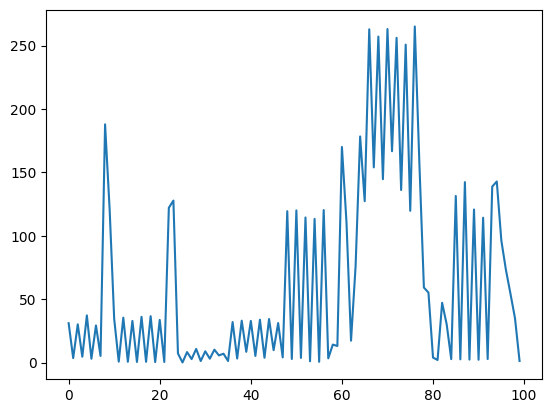

265.1239273397117
100


,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2010-10-05,387.000952,2.674475,387.214381,2.600460,387.231143,2.797271,387.325429,2.564315,165.102024,117.763578,...,7.610589,1.690623,8.221556,1.867675,8.785038,5.339467,0.368555,0.264382,0.003912,0.000179
2004-05-02,376.398902,2.291191,376.614909,2.329521,376.437317,2.109036,376.615091,2.188370,366.951684,240.575398,...,11.784124,3.227797,12.514843,3.922316,19.512434,13.151439,0.808117,0.673734,0.004426,0.000582
2004-03-14,385.653932,0.466565,385.635128,0.439054,385.846923,0.517901,385.559138,0.367730,96.643700,65.700189,...,-2.957100,1.736511,-2.377429,1.996297,5.593529,3.229373,0.145211,0.102639,0.007268,0.000411
2003-06-15,368.894439,3.232639,369.407194,3.109573,369.546580,4.016480,369.487500,3.014848,273.396553,215.557059,...,9.409609,1.838396,9.837474,2.467814,16.329454,12.042879,0.588525,0.524830,0.001501,0.000392
2011-08-22,384.443758,6.413297,384.364392,5.781036,386.384762,7.663215,384.186892,5.506259,180.454576,181.538036,...,15.049728,0.969001,16.076217,1.197644,11.665070,10.062797,0.622831,0.595032,0.004782,0.001082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-05,385.575942,3.865836,385.526304,3.900505,385.971087,4.090368,384.768913,2.624566,280.297093,190.638278,...,6.069047,2.578034,6.027117,3.604236,15.122181,9.693823,0.507376,0.397674,0.012347,0.006277
2007-09-05,371.046471,4.495282,371.359708,4.188899,372.071397,6.209574,371.404559,4.085051,229.782265,214.250267,...,9.785852,2.233874,10.462408,2.257818,13.057172,10.041741,0.669926,0.583414,0.001954,0.000611
2009-08-27,383.392308,7.136872,383.493427,6.716729,384.960769,7.983294,383.239860,6.033280,171.209167,150.450496,...,14.858750,1.285311,15.720304,1.410340,10.752474,8.061537,0.479091,0.413763,0.003024,0.000831


In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector = SelectKBest(f_classif, k="all")
selector.fit_transform(X_train, y_train)
kbestscore = selector.scores_

h=plt.plot(kbestscore)
plt.show()

print(max(kbestscore))

cols = selector.get_support(indices=True)
print(len(cols))
X_new = X_train.iloc[:,cols]
X_new

In [33]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

m = SelectFromModel(RandomForestClassifier())
m.fit(X_train, y_train)

columns = m.get_support(indices=True)
X_newtrain = X_train.iloc[:,columns]
X_newtest = X_test.iloc[:,columns]

X_newtrain

,CO2504.std,Glob.mean,Glob.std,H2O168.mean,H2O336.mean,H2O42.mean,H2O504.mean,H2O672.mean,H2O84.mean,NET.mean,...,RHIRGA42.std,RHIRGA504.mean,RHIRGA504.std,RHIRGA672.mean,RHIRGA84.mean,T168.mean,T504.mean,T84.mean,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2010-10-05,2.564315,165.102024,117.763578,7.067619,7.035619,7.126762,7.014857,6.991048,7.106038,72.904003,...,11.364356,67.620571,11.502649,68.481524,66.927547,8.195665,7.850559,8.221556,0.003912,0.000179
2004-05-02,2.188370,366.951684,240.575398,5.070549,5.003758,5.167927,4.961212,4.913030,5.132927,244.310789,...,13.481243,36.255030,10.055706,36.043091,36.599878,12.302249,11.953242,12.514843,0.004426,0.000582
2004-03-14,0.367730,96.643700,65.700189,4.037863,4.020256,4.051282,4.016466,4.012241,4.039316,58.942343,...,7.989524,81.200948,7.933199,82.010172,79.142479,-2.493457,-2.811229,-2.377429,0.007268,0.000411
2003-06-15,3.014848,273.396553,215.557059,7.127041,6.902500,7.460155,6.793724,6.694490,7.291546,197.334420,...,21.485469,56.794031,12.730337,57.073316,61.583763,9.783248,9.716369,9.837474,0.001501,0.000392
2011-08-22,5.506259,180.454576,181.538036,13.616242,13.554527,13.691429,13.521486,13.487838,13.667114,136.129920,...,6.918908,77.703108,6.717325,78.934324,75.097114,15.836196,15.334772,16.076217,0.004782,0.001082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-05,2.624566,280.297093,190.638278,2.936159,2.911304,2.991159,2.880435,2.859420,2.942446,176.848287,...,9.803888,30.950942,7.075854,30.741594,32.414892,6.096478,6.124511,6.027117,0.012347,0.006277
2007-09-05,4.085051,229.782265,214.250267,8.107353,7.999781,8.339191,7.962353,7.915147,8.236788,168.240949,...,14.044131,66.584044,15.434629,66.979118,66.548029,10.341049,9.969249,10.462408,0.001954,0.000611
2009-08-27,6.033280,171.209167,150.450496,13.785315,13.669510,13.992727,13.605315,13.562028,13.883357,86.448825,...,7.422274,78.801888,7.480318,79.850140,77.409301,15.540980,15.112714,15.720304,0.003024,0.000831


We can test now test the effectivity of this modified dataset by training one model with the default one and the other with the modified one:

In [35]:
rf_default = RandomForestClassifier()
rf_cutdown = RandomForestClassifier()

rf_default.fit(X_train, y_train)
rf_cutdown.fit(X_newtrain, y_train)

print("default:", rf_default.score(X_test, y_test))
print("feature selection:", rf_cutdown.score(X_newtest, y_test))

default: 0.8924731182795699
feature selection: 0.9032258064516129


Again, the modified model does not perform much better (even worse!) but it should be a lot less flexible.

In [28]:
rf = RandomForestClassifier()
rf.fit(X_newtrain, y_train)

print("Accuracy on train data:", rf.score(X_newtrain, y_train))
print("Accuracy on test data:", rf.score(X_newtest, y_test))

Accuracy on train data: 1.0
Accuracy on test data: 0.9032258064516129


## Conclusion week 1

With testing the most influential hyperparameters we can say that none of them really made a big difference. RandomForestClassifier is very effective even with it's default parameters. From modifying the dataset, we can see that it was influential and should be done, since it also makes our model a lot less complicated and easier to iterate with. Accuracy in the training data is 100% and on the test data it is around 44-45%.

Sources:
- [RandomForestClassifier - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [Hyperparameter Tuning the Random Forest in Python - Towards Data Science](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)
- [SelectFromModel - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html)
- [SelectKBest - SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)

# Random Forest Classifier in Multiclass NPF Data

Let's try Random Forest Classifier against multiple classes on the NPF data:
- nonevent
- Ia
- Ib
- II

In [4]:
import pandas as pd
import numpy as np

npf = pd.read_csv("npf_train.csv")

npf = npf.set_index("date")
npf = npf.drop("id", axis=1)
npf = npf.drop("partlybad", axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X = npf.drop(["class4"], axis=1)
y = npf["class4"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)
X_train


,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,Glob.std,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2010-10-05,387.000952,2.674475,387.214381,2.600460,387.231143,2.797271,387.325429,2.564315,165.102024,117.763578,...,7.610589,1.690623,8.221556,1.867675,8.785038,5.339467,0.368555,0.264382,0.003912,0.000179
2004-05-02,376.398902,2.291191,376.614909,2.329521,376.437317,2.109036,376.615091,2.188370,366.951684,240.575398,...,11.784124,3.227797,12.514843,3.922316,19.512434,13.151439,0.808117,0.673734,0.004426,0.000582
2004-03-14,385.653932,0.466565,385.635128,0.439054,385.846923,0.517901,385.559138,0.367730,96.643700,65.700189,...,-2.957100,1.736511,-2.377429,1.996297,5.593529,3.229373,0.145211,0.102639,0.007268,0.000411
2003-06-15,368.894439,3.232639,369.407194,3.109573,369.546580,4.016480,369.487500,3.014848,273.396553,215.557059,...,9.409609,1.838396,9.837474,2.467814,16.329454,12.042879,0.588525,0.524830,0.001501,0.000392
2011-08-22,384.443758,6.413297,384.364392,5.781036,386.384762,7.663215,384.186892,5.506259,180.454576,181.538036,...,15.049728,0.969001,16.076217,1.197644,11.665070,10.062797,0.622831,0.595032,0.004782,0.001082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-04-05,385.575942,3.865836,385.526304,3.900505,385.971087,4.090368,384.768913,2.624566,280.297093,190.638278,...,6.069047,2.578034,6.027117,3.604236,15.122181,9.693823,0.507376,0.397674,0.012347,0.006277
2007-09-05,371.046471,4.495282,371.359708,4.188899,372.071397,6.209574,371.404559,4.085051,229.782265,214.250267,...,9.785852,2.233874,10.462408,2.257818,13.057172,10.041741,0.669926,0.583414,0.001954,0.000611
2009-08-27,383.392308,7.136872,383.493427,6.716729,384.960769,7.983294,383.239860,6.033280,171.209167,150.450496,...,14.858750,1.285311,15.720304,1.410340,10.752474,8.061537,0.479091,0.413763,0.003024,0.000831


#### RandomizedSearchCV:

In [8]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
min_samples_split = [4, 5, 6, 8]
min_samples_leaf = [2, 4, 6]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [4, 5, 6, 8],
 'min_samples_leaf': [2, 4, 6],
 'bootstrap': [True, False]}

In [9]:
%%capture

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train, y_train);

In [10]:
rf_random.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_depth': 20,
 'bootstrap': False}

#### GridSearchCV

In [ ]:
%%capture

from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [60, 80, 100, 110],
 'max_depth': [80, 100, 120, None],
 'min_samples_split': [3, 4, 5],
 'min_samples_leaf': [3, 4, 5],
 'bootstrap': [True]}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

In [14]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 120,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 80}

In [32]:
rf_default = RandomForestClassifier()
rf_modified = RandomForestClassifier(max_depth=80, min_samples_leaf=5, min_samples_split=4)

rf_default.fit(X_train, y_train)
rf_modified.fit(X_train, y_train)

print("default", rf_default.score(X_test, y_test))
print("modified", rf_modified.score(X_test, y_test))

default 0.7526881720430108
modified 0.7096774193548387


Modified is still usually worse performing than the default model.

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print("Accuracy on train data:", rf.score(X_train, y_train))
print("Accuracy on test data:", rf.score(X_test, y_test))

Accuracy on train data: 1.0
Accuracy on test data: 0.7311827956989247


## Conclusion week 2

With multiple classes classification we can achieve around 72-77% accuracy with the RandomForestClassifier.